## Business Scenario: 
Our client, ElectricCo, is a major utility company providing gas and electricity to corporate, SME and residential customers.  In recent years, post-liberalization of the energy market in Europe, ElectricCo has had a growing problem with increasing customer defections above industry average. They would like to identify the drivers of this problem and to devise and implement a strategy to counter it. The churn issue is most acute in the SME division and thus they want it to be the first priority. The head of the SME division has asked whether it is possible to predict the customers which are most likely to churn so that they can trial a range of pre-emptive actions. 

In [1]:
# importing the required libraries.
import pandas as pd          
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost.sklearn import XGBClassifier
from imblearn.under_sampling import TomekLinks
seed = 98
import seaborn as sns
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff

In [2]:
# Importing the datasets.
price = pd.read_csv('Hackathon_case_training_hist_data.csv')
dataset = pd.read_csv('Hackthon_case_training_data.csv')
train = pd.read_csv('Hackthon_case_training_output.csv')

In [3]:
dataset.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,11/7/2012,11/6/2016,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,8/21/2009,8/30/2016,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
price.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
train.head()

,id,churn
0,bce18656f4906cb0931b65553fbee747,0
1,3a114f52a1243c46d33707ccd2cf5fb7,1
2,c0108757957b68a4bb778b25725f0382,0
3,a9de4be8d8235fa729591ec2437e767a,0
4,61200c2a7f17b2d842939106daa7f882,0


In [6]:
price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [7]:
dataset.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [8]:
train.describe()

,churn
count,15500.000000
mean,0.099548
std,0.299407
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
id                          16096 non-null object
activity_new                6551 non-null object
campaign_disc_ele           0 non-null float64
channel_sales               11878 non-null object
cons_12m                    16096 non-null int64
cons_gas_12m                16096 non-null int64
cons_last_month             16096 non-null int64
date_activ                  16096 non-null object
date_end                    16094 non-null object
date_first_activ            3508 non-null object
date_modif_prod             15939 non-null object
date_renewal                16056 non-null object
forecast_base_bill_ele      3508 non-null float64
forecast_base_bill_year     3508 non-null float64
forecast_bill_12m           3508 non-null float64
forecast_cons               3508 non-null float64
forecast_cons_12m           16096 non-null float64
forecast_cons_year          16096 non-null int64

In [10]:
# Function for visualizing missing values to get a clear picture.
def missing_value_count(data):
    
    miss = data.isnull().sum()/len(data)
    miss = miss[miss > 0]
    miss.sort_values(inplace=True)

    #visualising missing values
    miss = miss.to_frame()
    miss.columns = ['count']
    miss.index.names = ['Name']
    miss['Name'] = miss.index

    #plot the missing value count
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = 'count', data=miss)
    plt.xticks(rotation = 90)
    plt.title("Missing values count")
    plt.show()

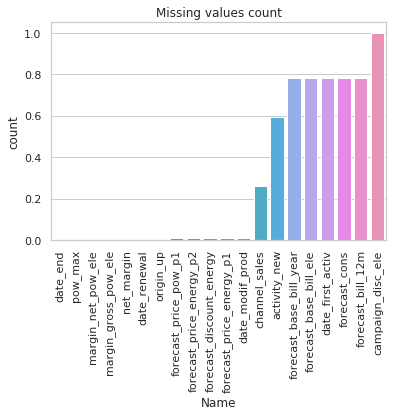

In [11]:
missing_value_count(dataset)

Here we can see that most of the feature columns contains very large missing values.
Droping the columns whose missing value count exceeds 0.5.

In [12]:
drop_columns = ['activity_new','campaign_disc_ele','date_first_activ','forecast_base_bill_year',
                    'forecast_base_bill_ele','forecast_cons','forecast_bill_12m']
for col in drop_columns:
    dataset = dataset.drop([col],axis=1)   # columns irrelevant are dropped.

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 25 columns):
id                          16096 non-null object
channel_sales               11878 non-null object
cons_12m                    16096 non-null int64
cons_gas_12m                16096 non-null int64
cons_last_month             16096 non-null int64
date_activ                  16096 non-null object
date_end                    16094 non-null object
date_modif_prod             15939 non-null object
date_renewal                16056 non-null object
forecast_cons_12m           16096 non-null float64
forecast_cons_year          16096 non-null int64
forecast_discount_energy    15970 non-null float64
forecast_meter_rent_12m     16096 non-null float64
forecast_price_energy_p1    15970 non-null float64
forecast_price_energy_p2    15970 non-null float64
forecast_price_pow_p1       15970 non-null float64
has_gas                     16096 non-null object
imp_cons                    16096 non-n

In [14]:
dataset.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')

In [15]:
len(dataset.columns)

25

In [16]:
train.shape

(15500, 2)

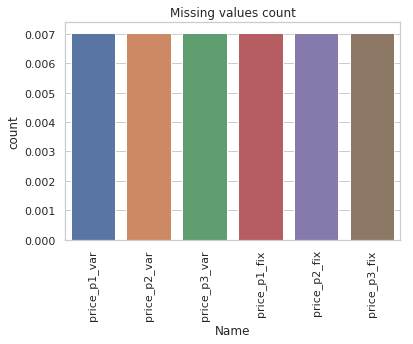

In [17]:
missing_value_count(price)

There is no significant missing value in the price dataset.


'''price dataset contains different prices for 1-12 days.
    the median value of the id is taken with the help of group function.
    '''

In [18]:
price.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


Here we have got 193002 rows which are the price taken for 12 days of the month.
we can take median of the same ' id ' to merge it with the dataset we are processing on.


In [19]:
price_data1 = price.groupby(['id']).median() 

In [20]:
price_data1.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.073719,40.728885,24.437330,16.291555
0004351ebdd665e6ee664792efc4fd13,0.148047,0.000000,0.000000,44.444710,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.122157,0.100029,0.069027,40.647429,24.388455,16.258972
00114d74e963e47177db89bc70108537,0.149434,0.000000,0.000000,44.266930,0.000000,0.000000


In [21]:
# This function presents the heatmap of correlation.
def corr_heatmap(corr):
    trace = go.Heatmap(z=corr.values.tolist(), x=corr.columns, y=corr.columns)
    data=[trace]
    layout = go.Layout(
            title='Heatmap of pairwise correlation of the columns',
            autosize=False,
            width=850,
            height=700,
            yaxis=go.layout.YAxis(automargin=True),
            xaxis=dict(tickangle=40),
            margin=go.layout.Margin(l=0, r=100, b=100, t=80)
                )


    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='labelled-heatmap1')

In [22]:
# calling the function.
corr_heatmap(price.corr())

we can infer from the above visualization that there is strong correlation on the red squares.
so keeping only one of the correlated sets inot new price dataframe i.e (pri_df).

In [23]:
pri_df = pd.DataFrame()             # creating a new pri_df dataframe.
    # putting the desired values after correlation measure into pri_df.
pri_df['id'] = price_data1.index
pri_df['price_p1_var'] = price_data1['price_p1_var'].values
pri_df['price_p2_var'] = price_data1['price_p2_var'].values
pri_df['price_p1_fix'] = price_data1['price_p1_fix'].values

In [24]:
# merging the dataset with the price dataset and storing it into a new dataframe for further processing.
df = pd.merge(dataset, pri_df,how='inner', on='id')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 28 columns):
id                          16096 non-null object
channel_sales               11878 non-null object
cons_12m                    16096 non-null int64
cons_gas_12m                16096 non-null int64
cons_last_month             16096 non-null int64
date_activ                  16096 non-null object
date_end                    16094 non-null object
date_modif_prod             15939 non-null object
date_renewal                16056 non-null object
forecast_cons_12m           16096 non-null float64
forecast_cons_year          16096 non-null int64
forecast_discount_energy    15970 non-null float64
forecast_meter_rent_12m     16096 non-null float64
forecast_price_energy_p1    15970 non-null float64
forecast_price_energy_p2    15970 non-null float64
forecast_price_pow_p1       15970 non-null float64
has_gas                     16096 non-null object
imp_cons                    16096 non-n

In [26]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'price_p1_var',
       'price_p2_var', 'price_p1_fix'],
      dtype='object')

In [27]:
# checking train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 2 columns):
id       15500 non-null object
churn    15500 non-null int64
dtypes: int64(1), object(1)
memory usage: 242.3+ KB


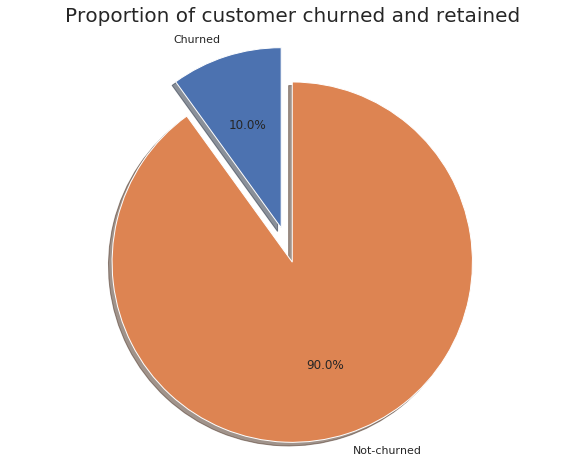

In [28]:
labels = 'Churned', 'Not-churned'
sizes = [train.churn[train['churn']==1].count(), train.churn[train['churn']==0].count()]
explode = (0, 0.2)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

The above pie chart shows that the problem is of imbalance class as only 10% of the data belongs to the churned class.

In [29]:
# Creating a different dataframe for visualization purpose.
df_vis = pd.merge(df, pri_df,how = 'inner',on ='id')
df_vis = pd.merge(dataset,train, how= 'inner',on = 'id')

In [30]:
df_vis.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,11/7/2012,11/6/2016,11/7/2012,11/9/2015,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,NaN,6/23/2015,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 28 columns):
id                          16096 non-null object
channel_sales               11878 non-null object
cons_12m                    16096 non-null int64
cons_gas_12m                16096 non-null int64
cons_last_month             16096 non-null int64
date_activ                  16096 non-null object
date_end                    16094 non-null object
date_modif_prod             15939 non-null object
date_renewal                16056 non-null object
forecast_cons_12m           16096 non-null float64
forecast_cons_year          16096 non-null int64
forecast_discount_energy    15970 non-null float64
forecast_meter_rent_12m     16096 non-null float64
forecast_price_energy_p1    15970 non-null float64
forecast_price_energy_p2    15970 non-null float64
forecast_price_pow_p1       15970 non-null float64
has_gas                     16096 non-null object
imp_cons                    16096 non-n

In [32]:
# definfig some parameters for evaluation.
churn     = df_vis[df_vis["churn"] == 1]
not_churn = df_vis[df_vis["churn"] == 0]

target_col = ["churn"]
cat_cols   = df_vis.nunique()[df_vis.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df_vis.columns if x not in cat_cols + target_col]

In [33]:
cat_cols

['channel_sales', 'has_gas', 'nb_prod_act', 'origin_up']

In [34]:
num_cols

['id',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'num_years_antig',
 'pow_max']

In [35]:
# carring out EDA process.
def plot_pie(column):
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",domain  = dict(x = [0,.48]),
                    name    = "Churn Customers", marker  = dict(line = dict(width = 2,
                  color = "rgb(243,243,243)")),hole    = .6)
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name", marker  = dict(line = dict(width = 2,
                    color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" )


    layout = go.Layout(dict(title = column + " distribution in customer database ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers", font = dict(size = 13),
                                        showarrow = False, x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .85,y = .5
                                               )]))
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


In [36]:
plot_pie(cat_cols[0])

## inference

1. The above pie chart shows us that the customers with ids:
    1. sddiedcslfslkckwlfkdpoeeailfpeds
    2. epumfxlbckeskwekxbiuasklxalciiuu
    3. fixdbufsefwooaasfcxdxadsiekoceaa
    do not contribut to the churn customers.
2. Most of the churn customers belong to foosdfpfkusacimwkcsosbicdxkicaua



In [37]:
df_vis.groupby('channel_sales').size()

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu       3
ewpakwlliwisiwduibdlfmalxowmwpci     937
fixdbufsefwooaasfcxdxadsiekoceaa       1
foosdfpfkusacimwkcsosbicdxkicaua    7102
lmkebamcaaclubfxadlmueccxoimlema    1987
sddiedcslfslkckwlfkdpoeeailfpeds      12
usilxuppasemubllopkaafesmlibmsdf    1391
dtype: int64

In [38]:
# checking for other inferences from the dataset.
plot_pie(cat_cols[1])

The has_gas distribution does not provide much information other than the dataset is filled more with 'f' type of has_gas.

In [39]:
plot_pie(cat_cols[2])

Here the categories  ( 32,9,6,8,31,10) do not contribute to churn customers.

In [40]:
plot_pie(cat_cols[3])

Here also only upper three id's represented in the pie-plot contribute to the churn and last two id's dont contribute towards churn.

In [41]:
# now we will analyse the numerical columns for gathering more information about the datset.
#function  for histogram for customer churn types
def histogram(column) :

    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black" )),opacity = .8 ) 
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                         color = "black")), opacity = .9)
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in the dataset ",
                            plot_bgcolor  = "rgb(225,245,248)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    

The skewness of SalePrice is 6.0389594271614415


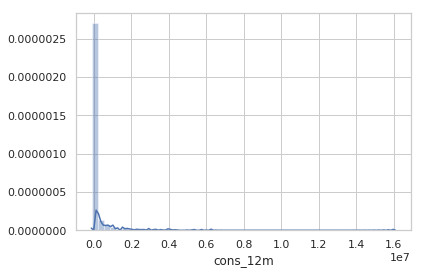

In [42]:
# The above shows a positively skewed histogram.
sns.distplot(dataset['cons_12m'])
print("The skewness of SalePrice is {}".format(dataset['cons_12m'].skew()))

In [43]:
histogram(num_cols[3])

There is not much information that can be drawn from this distribution other than the fact that the data is skewed and most value is concentrated towards 0.

In [44]:
histogram(num_cols[4])

If we take a close look at the distribution above we can see that the people who joined first are tend to leave more .
One reason may be they are not getting what they want or maybe they got a better offer at other place.


The company needs to Evaluate their annual report on customers and should bring new features and offers to the customers so that they do not think about leaving the Electric connection by this company.

In [45]:
histogram(num_cols[16])

We can see from the plot that the churners increases from 25-35 range of margin_gross_pow_ele.

In [46]:
histogram(num_cols[17])

This distribution is like a normal distribution that suggests that almost 90% of the people belong to the 10 to 40 group of margin_net_pow_ele and the churn customers are most at 25-35 group.

In [47]:
histogram(num_cols[19])

We can infer from the plot that maximum number of churners are those who have num_years_actig  = 4 also 3 and 6 num_years_antig is a feature to be reviewed. 

In [48]:
# Working with date columns
date_col = ['date_activ','date_end','date_modif_prod','date_renewal' ]
    
''' The date columns has been converted into datetime to extract relevant 
    details like date, year, month etc.
    here we have extracted days and diffference is calculated.
    '''
for date in date_col:
    df[date] = pd.to_datetime(df[date]) 
dates_diff = pd.DataFrame()
days = pd.DataFrame()
dates_diff['date_end-activ'] = df['date_end']-df['date_activ']
days['days_end-activ']=dates_diff.iloc[:,0].dt.days
dates_diff['date_modif-_activ']=df['date_modif_prod']-df['date_activ']
days['date_modif-activ'] = dates_diff.iloc[:,1].dt.days
dates_diff['date_end-renewal']=df['date_end']-df['date_renewal']
days['date_end-renewal'] = dates_diff.iloc[:,2].dt.days
   
dates_diff['date_end-modif']=df['date_end']-df['date_modif_prod']
days['date_end-modif'] = dates_diff.iloc[:,3].dt.days
# Dropping the date columns after processing information from it and storing in df.
for col in date_col:
    df = df.drop([col],axis=1)
#concat function of pandas joins days dataframe with processing dataframe.
df = pd.concat([df,days],axis=1)
   

In [49]:
df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,days_end-activ,date_modif-activ,date_end-renewal,date_end-modif
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,...,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.106043,0.093474,58.936780,1460.0,0.0,363.0,1460.0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.125976,0.103395,40.565973,1096.0,NaN,358.0,NaN
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,189.95,0,0.0,16.27,0.145711,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.151367,0.000000,44.266931,2566.0,0.0,365.0,2566.0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.172426,0.088409,44.444710,2192.0,0.0,365.0,2192.0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.153048,0.000000,44.444710,2192.0,0.0,365.0,2192.0


In [50]:
corr = df.corr() # finding correlation between columns of df.
corr_heatmap(corr)#visualization of the heatmap

In [51]:
# list of columns to be dropped after correlation analysis.
drop_corr_columns = ['cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_price_energy_p1',
                         'forecast_price_energy_p2', 'forecast_price_pow_p1','days_end-activ','margin_gross_pow_ele']
for col in drop_corr_columns:
    df = df.drop([col],axis=1)

In [52]:
# missing value imputation.
# manual inputation of missing categorical values with mode.
df['origin_up'].fillna('lxidpiddsbxsbosboudacockeimpuepw',inplace =True)
df['channel_sales'].fillna('foosdfpfkusacimwkcsosbicdxkicaua',inplace =True)
df['has_gas'].fillna('f',inplace =True)



In [53]:
df1 = pd.merge(df,train,how = 'inner', on = 'id')
# converting the categorical variables into numerical variables.
df1 = df1.drop(['id'],axis=1)
dummies= pd.get_dummies(df1)

In [54]:
dummies.head()

,cons_12m,cons_gas_12m,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,...,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_f,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,309275,0,0.0,359.29,831.8,-41.76,1,1732.36,3,180.000,...,1,0,0,1,0,0,0,1,0,0
1,0,54946,0.0,1.78,0.0,25.44,2,678.99,3,43.648,...,0,0,0,0,1,0,0,0,1,0
2,4660,0,0.0,16.27,0.0,16.38,1,18.89,6,13.800,...,0,0,0,1,0,0,1,0,0,0
3,544,0,0.0,38.72,0.0,28.60,1,6.60,6,13.856,...,0,0,0,1,0,0,1,0,0,0
4,1584,0,0.0,19.83,0.0,30.22,1,25.46,6,13.200,...,1,0,0,1,0,0,1,0,0,0


In [55]:
# removing the columns which are least significant that we inferred from the pie chart.
drop_col = ['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds','has_gas_t',
            'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa','channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
            'origin_up_usapbepcfoloekilkwsdiboslwaxobdp','origin_up_ewxeelcelemmiwuafmddpobolfuxioce']
for col in drop_col:
    dummies= dummies.drop([col],axis=1)

In [56]:
# filling the null values with median of the column.
for col in dummies.columns:
    dummies[col].fillna(dummies[col].median(), inplace=True)




## Box plot for outlier detection 

In [57]:
dummies.columns

Index(['cons_12m', 'cons_gas_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'imp_cons', 'margin_net_pow_ele',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max',
       'price_p1_var', 'price_p2_var', 'price_p1_fix', 'date_modif-activ',
       'date_end-renewal', 'date_end-modif', 'churn',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sales_usilxuppasemubllopkaafesmlibmsdf', 'has_gas_f',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw'],
      dtype='object')

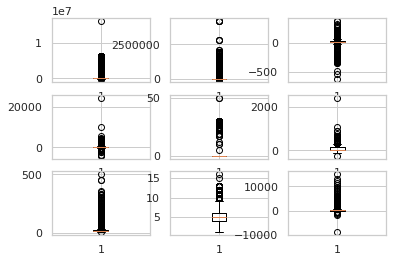

In [58]:
fig = plt.subplot()

plt.subplot(3, 3, 1)
plt.boxplot(dummies.cons_12m)

plt.subplot(3, 3, 2)
plt.boxplot(dummies.cons_gas_12m)

plt.subplot(3, 3, 3)
plt.boxplot(dummies.margin_net_pow_ele)

plt.subplot(3, 3, 4)
plt.boxplot(dummies.net_margin)

plt.subplot(3, 3, 5)
plt.boxplot(dummies.forecast_discount_energy)

plt.subplot(3, 3, 6)
plt.boxplot(dummies.forecast_meter_rent_12m)

plt.subplot(3, 3, 7)
plt.boxplot(dummies.pow_max)
plt.subplot(3, 3, 8)
plt.boxplot(dummies.num_years_antig)

plt.subplot(3, 3, 9)
plt.boxplot(dummies.imp_cons)

plt.show()

The box plot shows us that the column contains outliers so we need to remove them.
one such method can be by clipping the outliers.


In [59]:
# clipping the values with the upper and lower percentiles .
# we are taking the clip value for lower percentile as 5 and upper as 85.0
cols = ['cons_12m', 'cons_gas_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'imp_cons', 'margin_net_pow_ele',
        'net_margin', 'num_years_antig', 'pow_max']
for col in cols:
    dummies[col] = dummies[col].clip(np.percentile(dummies[col],5),np.percentile(dummies[col],85))


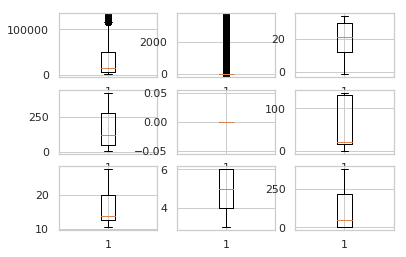

In [60]:
fig = plt.subplot()

plt.subplot(3, 3, 1)
plt.boxplot(dummies.cons_12m)

plt.subplot(3, 3, 2)
plt.boxplot(dummies.cons_gas_12m)

plt.subplot(3, 3, 3)
plt.boxplot(dummies.margin_net_pow_ele)

plt.subplot(3, 3, 4)
plt.boxplot(dummies.net_margin)

plt.subplot(3, 3, 5)
plt.boxplot(dummies.forecast_discount_energy)

plt.subplot(3, 3, 6)
plt.boxplot(dummies.forecast_meter_rent_12m)

plt.subplot(3, 3, 7)
plt.boxplot(dummies.pow_max)
plt.subplot(3, 3, 8)
plt.boxplot(dummies.num_years_antig)

plt.subplot(3, 3, 9)
plt.boxplot(dummies.imp_cons)

plt.show()

We can see that the plots are more refined now. we would not refine more beacuse of loss of information.
The box plot of 'cons_gas_12m' contains most number of zeroes thats why its behaving this way.

In [61]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15500 entries, 0 to 15499
Data columns (total 25 columns):
cons_12m                                          15500 non-null float64
cons_gas_12m                                      15500 non-null float64
forecast_discount_energy                          15500 non-null float64
forecast_meter_rent_12m                           15500 non-null float64
imp_cons                                          15500 non-null float64
margin_net_pow_ele                                15500 non-null float64
nb_prod_act                                       15500 non-null int64
net_margin                                        15500 non-null float64
num_years_antig                                   15500 non-null int64
pow_max                                           15500 non-null float64
price_p1_var                                      15500 non-null float64
price_p2_var                                      15500 non-null float64
price_p1_fix       

# splitting the data into train and test set for validation and testing

In [62]:
X = dummies.drop(['churn'],axis=1)
y = dummies['churn']

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = .25, random_state = seed)

Using logistic regression as our baseline model for classification.

In [64]:
lr = LogisticRegression(penalty = 'l2', C = 1.0,
                        class_weight = 'balanced', 
                            random_state = seed, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)

In [65]:
# K-fold cross validation.
accuracies = cross_val_score(estimator=lr , X = xtrain, y = ytrain, cv = 5)
print(accuracies.mean())

lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
yprob = lr.predict_proba(xtest)
cm = confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred),end = '\n')


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]0.5970735373508808
[LibLinear]              precision    recall  f1-score   support

           0       0.93      0.59      0.72      3476
           1       0.14      0.60      0.23       399

   micro avg       0.59      0.59      0.59      3875
   macro avg       0.54      0.60      0.48      3875
weighted avg       0.85      0.59      0.67      3875



In [66]:
def my_plot_roc_curve (y_true, y_prob):
    #
    # Function to plot the ROC curve by computing fpr and tpr as well as save the plot to file
    # Args:
    #   y_true: array of y true label
    #   y_prob: the output of y probability prediction (outcome for predict_proba() function)
    #   filename: the name of the file to be saved
    #   dpi: the resolution of the figure
    # Return:
    #   None
    #
    fpr, tpr, threshold = roc_curve(y_true, y_prob[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

so our baseline is 60% accurate. The precision and recall is not that better in this case because we are dealing with imbalanced class dataset.

## In case of this problem ROC-AUC score is preffered
we prefer Roc-Auc score over accuracy beacause accuracy in this case may be misleading because the model in most of the cases tends to predict the most probable output i.e 0. This is a common problem in imbalanced class classification problems.


0.6391828247257961


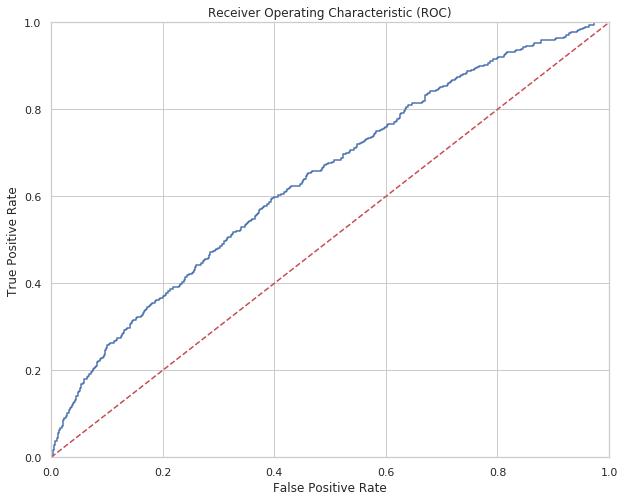

In [67]:
test_labels = lr.predict_proba(np.array(xtest))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(ytest, test_labels , average = 'macro')
print(lr_roc_auc)
my_plot_roc_curve(ytest,yprob)

In [68]:
# using random forest model for futher analysis.

rf = RandomForestClassifier(n_estimators=100)

rf.fit(xtrain,ytrain)
test_labels = rf.predict_proba(np.array(xtest))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(ytest, test_labels , average = 'macro')
rf_roc_auc


0.677927557674393

Here the auc-roc score is much better than the logistic regression model.


We will try to improve the performanence of the model by Hyperparameter tuning.


In [69]:
# function for grid-search to chose beast parameters.
def gridsearch(model,param_grid, X, y):
    '''     
    Perform Gridsearch for the given model and return the best model
    '''
    grid_search = GridSearchCV(model, param_grid=param_grid, verbose=1, n_jobs=-1,scoring = 'recall')
    grid_search.fit(X, y)
    print(grid_search.best_estimator_)
    print("Grid scores on development set:")
    return model

param_grid = dict(n_estimators=[100, 200],
                  max_depth = [4,8],
                  max_features=[6, 10,16,20,14],max_leaf_nodes=[2,4,6,8,16],
                  class_weight=['balanced',None]
                )
rf = gridsearch(rf ,param_grid, xtrain, ytrain)
rf.fit(xtrain, ytrain)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/home/dhiraj/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features=6,
            max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Grid scores on development set:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Roc: 0.6637443724385763
Accuracy score : 0.8990967741935484
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3476
           1       0.72      0.03      0.06       399

   micro avg       0.90      0.90      0.90      3875
   macro avg       0.81      0.52      0.50      3875
weighted avg       0.88      0.90      0.86      3875



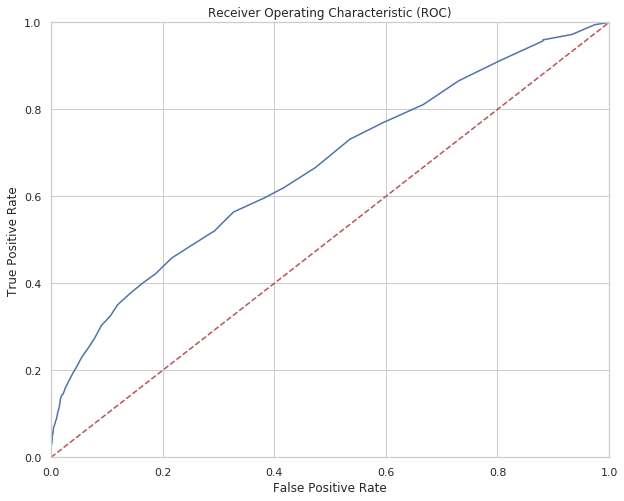

In [70]:
test_labels = rf.predict_proba(np.array(xtest))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(ytest, test_labels , average = 'macro')
print('Roc:',rf_roc_auc)
y_pred = rf.predict(xtest)
y_prob = rf.predict_proba(xtest)
print('Accuracy score :', rf.score(xtest,ytest))
print(classification_report(ytest,y_pred),end = '\n')

my_plot_roc_curve(ytest,y_prob)

The tunning does not affect much in this case.
We will use XGBClassifier to check for further improvement.

In [71]:
xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         
                        )

xgb.fit(xtrain, ytrain, eval_set = [(xtrain, ytrain), (xtest, ytest)], 
             early_stopping_rounds = 20)

[05:18:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[0]	validation_0-error:0.098839	validation_1-error:0.104516
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[05:18:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[1]	validation_0-error:0.098409	validation_1-error:0.102968
[05:18:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[2]	validation_0-error:0.098237	validation_1-error:0.102968
[05:18:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[3]	validation_0-error:0.098409	validation_1-error:0.102968
[05:18:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[4]	validation_0-error:0.098409	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=1, learning_rate=0.15, max_delta_step=3,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=10, scale_pos_weight=1.5, seed=None,
       silent=False, subsample=0.9)

In [72]:

y_pred = xgb.predict(xtest)
print('Accuracy score :', xgb.score(xtest,ytest))
print(classification_report(ytest,y_pred),end = '\n')


Accuracy score : 0.8970322580645161
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3476
           1       0.00      0.00      0.00       399

   micro avg       0.90      0.90      0.90      3875
   macro avg       0.45      0.50      0.47      3875
weighted avg       0.80      0.90      0.85      3875



/home/dhiraj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/dhiraj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/dhiraj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



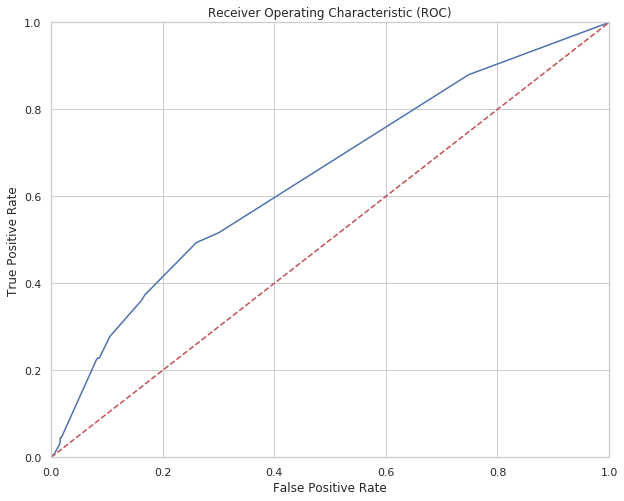

In [73]:
y_pred = xgb.predict(xtest)
yprobx = xgb.predict_proba(xtest)

my_plot_roc_curve (ytest, yprobx)

The model performs much worse than the random forest.


 1) cons_12m                       0.104158
 2) cons_gas_12m                   0.096425
 3) forecast_discount_energy       0.094343
 4) forecast_meter_rent_12m        0.094108
 5) imp_cons                       0.082235
 6) margin_net_pow_ele             0.082171
 7) nb_prod_act                    0.066413
 8) net_margin                     0.065717
 9) num_years_antig                0.063214
10) pow_max                        0.057158
11) price_p1_var                   0.053210
12) price_p2_var                   0.032245
13) price_p1_fix                   0.027721
14) date_modif-activ               0.013658
15) date_end-renewal               0.011800
16) date_end-modif                 0.010031
17) channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci 0.008931
18) channel_sales_foosdfpfkusacimwkcsosbicdxkicaua 0.006764
19) channel_sales_lmkebamcaaclubfxadlmueccxoimlema 0.006733
20) channel_sales_usilxuppasemubllopkaafesmlibmsdf 0.006303
21) has_gas_f                      0.006284
22) origin_u

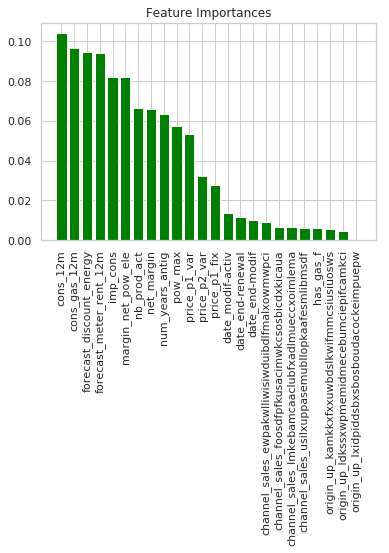

In [74]:
importances = rf.feature_importances_
features_label = X.columns
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()



### Sampling for imbalanced dataset 

0.673702380231361


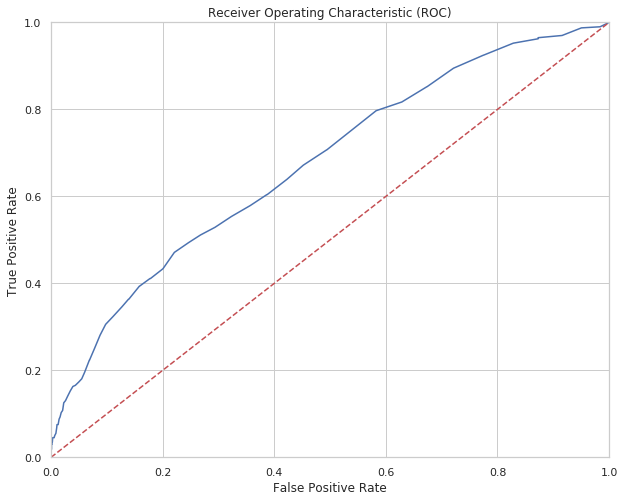

In [75]:
#Up-sampling by creating synthetic data rather than multiplying the minority data.
sm = SMOTE(random_state=seed, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(xtrain, ytrain)
rf.fit(x_train_res,y_train_res)

test_labels = rf.predict_proba(np.array(xtest))[:,1]
yprob = rf.predict_proba(xtest)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rfs_roc_auc = roc_auc_score(ytest, test_labels , average = 'macro')
print(rfs_roc_auc)
my_plot_roc_curve(ytest,yprob)

0.6817558135845944


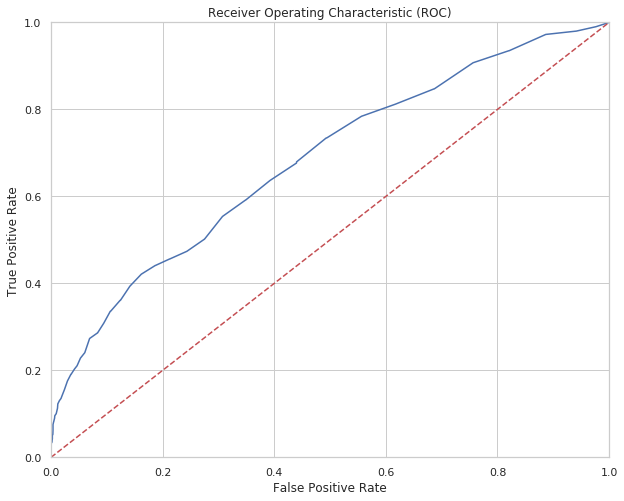

In [76]:
#down-sampling by creating synthetic data rather than multiplying the minority data.
Tl = TomekLinks(random_state=seed)
x_train_res, y_train_res = Tl.fit_sample(xtrain, ytrain)
rf.fit(x_train_res,y_train_res)

test_labels = rf.predict_proba(np.array(xtest))[:,1]
yprob = rf.predict_proba(xtest)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rfs_roc_auc = roc_auc_score(ytest, test_labels , average = 'macro')
print(rfs_roc_auc)
my_plot_roc_curve(ytest,yprob)

Down-sampling with random forest performs better than the up-sampling technique. So in churn problems we should down_sample the majority group so that the class must be balanced for effective prediction.

## Result 

The model can predict the churn of customers with 90% of accuracy and with 70 % of roc_auc which is more significant in this case.

The analysis shows that the old customers and customers belonging to certain groups between the distribution shown in the above cells should be viewed carefully.

Also certain discount oportunities should be extended for better customer growth.

There must also be a feedback system so that the correct intent of customers leaving the company should be known more clearly.

